In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from benchmark_base import sample_main

In [2]:
sns.set_palette("viridis")

In [3]:
MAX_ITERATIONS = 100 # maximum number of iterations
NUMBER_OF_ANTS = 25 # number of ants in the system
INITIAL_PHEROMONE_VALUE = 1.0 # initial pheromone value for each edge
PHEROMONE_INFLUENCE = 1.0 # influence of pheromone on route
PHEROMONE_DEPOSIT = 1.0 # pheromone deposit factor
EVAPORATION_RATE = 0.2 # pheromone evaporation rate

Define base set of parameters for the Ant System Algorithm except distance influence as we will change it throughout the benchmark. 

In [4]:
RUN_SAMPLES = 5 # run this many samples for each problem

data_list = []
for problem_size in ["SMALL", "MEDIUM", "LARGE"]:
    for DISTANCE_INFLUENCE in [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 8.0, 10.0]:
        average_samples = np.zeros((7)) # 7 parameters

        for run in range(RUN_SAMPLES):
            return_values = sample_main(problem_size, MAX_ITERATIONS, NUMBER_OF_ANTS, INITIAL_PHEROMONE_VALUE, DISTANCE_INFLUENCE, PHEROMONE_INFLUENCE, PHEROMONE_DEPOSIT, EVAPORATION_RATE) # evaluate the sample
            sample_array = np.array(return_values)
            average_samples += sample_array # add each sample to the average

        average_samples /= RUN_SAMPLES # divide by the number of samples to get the average

        data_list.append({'algorithm': 'Ant System', 'problem_size': problem_size.lower(), 'distance_influence': DISTANCE_INFLUENCE, 'distance': average_samples[0], 'time_taken': average_samples[1]}) # append the ant system sample to data list

benchmark_df = pd.DataFrame(data_list) # create a dataframe from the data list

Run the benchmarks with changing distance influence and group it into a dataframe for visualization later.

Text(0.5, 1.0, 'Performance of Ant System vs. Distance Influence')

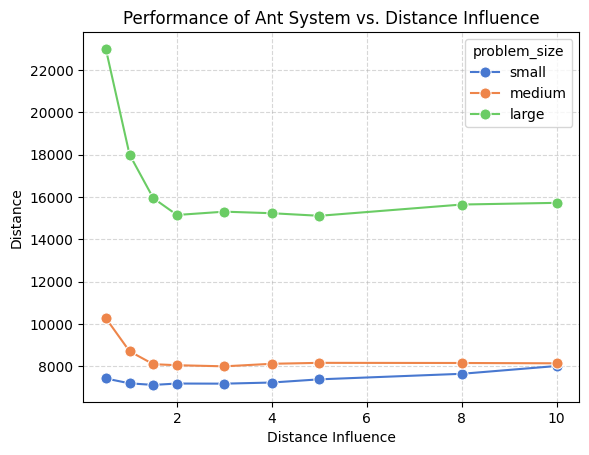

In [5]:
sns.lineplot(benchmark_df, x="distance_influence", y="distance", hue="problem_size", marker='o', markersize=8, palette="muted")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Distance Influence")
plt.ylabel("Distance")
plt.title("Performance of Ant System vs. Distance Influence")

Check performance across distance influence and various problem sizes.

In [6]:
DISTANCE_INFLUENCE = 2.0 # keep fixed distance influence for the next plot

In [7]:
RUN_SAMPLES = 5 # run this many samples for each problem

data_list = []
for problem_size in ["SMALL", "MEDIUM", "LARGE"]:
    for PHEROMONE_INFLUENCE in [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 8.0, 10.0]:
        average_samples = np.zeros((7)) # 7 parameters

        for run in range(RUN_SAMPLES):
            return_values = sample_main(problem_size, MAX_ITERATIONS, NUMBER_OF_ANTS, INITIAL_PHEROMONE_VALUE, DISTANCE_INFLUENCE, PHEROMONE_INFLUENCE, PHEROMONE_DEPOSIT, EVAPORATION_RATE) # evaluate the sample
            sample_array = np.array(return_values)
            average_samples += sample_array # add each sample to the average

        average_samples /= RUN_SAMPLES # divide by the number of samples to get the average

        data_list.append({'algorithm': 'Ant System', 'problem_size': problem_size.lower(), 'pheromone_influence': PHEROMONE_INFLUENCE, 'distance': average_samples[0], 'time_taken': average_samples[1]}) # append the ant system sample to data list

benchmark_df = pd.DataFrame(data_list) # create a dataframe from the data list

Text(0.5, 1.0, 'Performance of Ant System vs. Pheromone Influence')

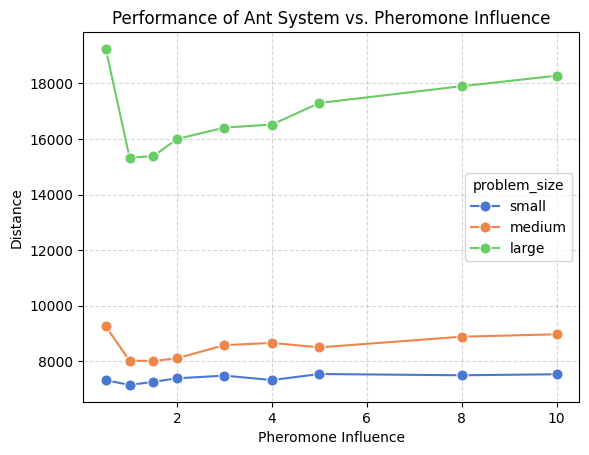

In [8]:
sns.lineplot(benchmark_df, x="pheromone_influence", y="distance", hue="problem_size", marker='o', markersize=8, palette="muted")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Pheromone Influence")
plt.ylabel("Distance")
plt.title("Performance of Ant System vs. Pheromone Influence")

Check performance across pheromone influence and various problem sizes.

In [9]:
RUN_SAMPLES = 5 # run this many samples for each problem

data_list = []

for DISTANCE_INFLUENCE in [0.1, 0.3, 0.5, 1.0, 1.5, 2.0]:
    for PHEROMONE_INFLUENCE in [0.1, 0.3, 0.5, 1.0, 1.5, 2.0]:
        average_samples = np.zeros((7)) # 7 parameters

        for run in range(RUN_SAMPLES):
            return_values = sample_main("LARGE", MAX_ITERATIONS, NUMBER_OF_ANTS, INITIAL_PHEROMONE_VALUE, DISTANCE_INFLUENCE, PHEROMONE_INFLUENCE, PHEROMONE_DEPOSIT, EVAPORATION_RATE) # evaluate the sample
            sample_array = np.array(return_values)
            average_samples += sample_array # add each sample to the average

        average_samples /= RUN_SAMPLES # divide by the number of samples to get the average

        data_list.append({'algorithm': 'Ant System', 'problem_size': "LARGE", 'distance_influence': DISTANCE_INFLUENCE, 'pheromone_influence': PHEROMONE_INFLUENCE, 'distance': average_samples[0], 'time_taken': average_samples[1]}) # append the ant system sample to data list

benchmark_df = pd.DataFrame(data_list) # create a dataframe from the data list

Now since the influences fight each other, it's better that we visualize them together instead of individually. We change both parameters for the benchmark now. We also only show the heatmap for the large problem size since it's the most influential problem and other sizes won't change heatmap much.

Text(58.222222222222214, 0.5, 'Pheromone Influence')

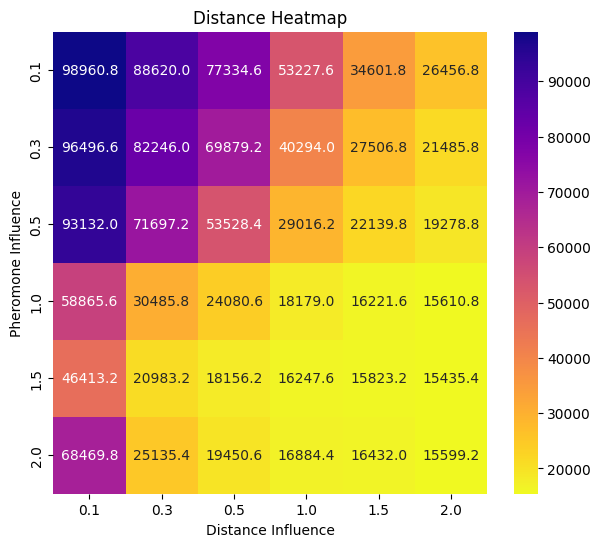

In [18]:
influence_heatmap = benchmark_df.pivot_table(index='pheromone_influence', columns='distance_influence', values='distance') # create pivot table for the heatmap

plt.subplots(figsize=(7, 6))

sns.heatmap(influence_heatmap, annot=True, fmt=".1f", cmap="plasma_r")
plt.title(f'Distance Heatmap')
plt.xlabel('Distance Influence')
plt.ylabel('Pheromone Influence')